In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style 
sns.set(font_scale=1.5)
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud , STOPWORDS

In [24]:
df = pd.read_csv('tweets_about_ExploreAI_with_more_columns.csv')
df.head()

,Unnamed: 0,Date,Username,Location,Tweet,URL,RenderedContent,id,DisplayName,FollowersCount,FriendsCount,StatusesCount,FavouritesCount,ReplyCount,RetweetCount,LikeCount,QuoteCount,Language,RetweetedTweet,QuotedTweet
0,0,2023-03-30 09:59:09+00:00,explore_ai_acad,South Africa,Join Kuda from @alx_africa this evening as he ...,https://twitter.com/explore_ai_acad/status/164...,Join Kuda from @alx_africa this evening as he ...,1641379529540222976,ExploreAI Academy,1946,177,441,304,0,1,2,0,en,NaN,https://twitter.com/alx_africa/status/16410490...
1,1,2023-03-29 19:43:27+00:00,fucked_its,NaN,@alx @explore_ai_acad the extension of the ap...,https://twitter.com/fucked_its/status/16411641...,@alx @explore_ai_acad the extension of the ap...,1641164183256412161,Its Fucked Up,31,36,1476,8355,0,0,0,0,en,NaN,NaN
2,2,2023-03-11 06:15:11+00:00,Dante_Manda,NaN,@explore_ai_acad I will. Thank you.,https://twitter.com/Dante_Manda/status/1634437...,@explore_ai_acad I will. Thank you.,1634437793689526272,Den Manda,0,22,13,11,0,0,0,0,en,NaN,NaN
3,3,2023-03-09 12:22:03+00:00,explore_ai_acad,South Africa,@Dante_Manda Applications for the July 2023 co...,https://twitter.com/explore_ai_acad/status/163...,@Dante_Manda Applications for the July 2023 co...,1633805345209319425,ExploreAI Academy,1946,177,441,304,1,0,0,0,en,NaN,NaN
4,4,2023-03-09 09:10:46+00:00,Dante_Manda,NaN,@explore_ai_acad When are applications opening?,https://twitter.com/Dante_Manda/status/1633757...,@explore_ai_acad When are applications opening?,1633757207031435271,Den Manda,0,22,13,11,1,0,0,0,en,NaN,NaN


In [25]:
df.shape

(374, 20)

In [26]:
df_train = pd.read_csv('tweets_about_ExploreAI_with_location.csv')
df_train.head()

,Unnamed: 0,Date,Username,Location,Tweet,Sentiment
0,0,2023-03-11 06:15:11+00:00,Dante_Manda,NaN,@explore_ai_acad I will. Thank you.,Positive
1,1,2023-03-09 12:22:03+00:00,explore_ai_acad,South Africa,@Dante_Manda Applications for the July 2023 co...,Neutral
2,2,2023-03-09 09:10:46+00:00,Dante_Manda,NaN,@explore_ai_acad When are applications opening?,Neutral
3,3,2023-03-08 14:41:39+00:00,Mr__Nwankwo,Trenches,@explore_ai_acad Beautiful and interactive space.,Positive
4,4,2023-03-07 13:47:56+00:00,_techbarbie_,"Lagos, Nigeria",@alx_africa Please can anyone here answer this...,Neutral


In [27]:
df_train.tail()

,Unnamed: 0,Date,Username,Location,Tweet,Sentiment
195,195,2022-06-10 10:13:03+00:00,explore_ai_acad,South Africa,Did you know that you can take your regression...,Neutral
196,196,2022-06-09 14:27:02+00:00,explore_ai_acad,South Africa,How do you know if your regression model is an...,Neutral
197,197,2022-06-08 16:41:01+00:00,explore_ai_acad,South Africa,Simple linear regression can easily be impleme...,Neutral
198,198,2022-06-07 18:29:01+00:00,explore_ai_acad,South Africa,We can choose the most appropriate regression ...,Neutral
199,199,2022-06-07 10:02:01+00:00,explore_ai_acad,South Africa,There's less than one week left to apply! ⌛ \n...,Neutral


In [28]:
df_test = df.drop(labels=range(2, 202), axis=0)
df_test = df_test.drop(columns=['Unnamed: 0'], axis=1).reset_index()
df_test.drop(columns=['index'], axis=1, inplace=True)

In [29]:
df_test

,Date,Username,Location,Tweet,URL,RenderedContent,id,DisplayName,FollowersCount,FriendsCount,StatusesCount,FavouritesCount,ReplyCount,RetweetCount,LikeCount,QuoteCount,Language,RetweetedTweet,QuotedTweet
0,2023-03-30 09:59:09+00:00,explore_ai_acad,South Africa,Join Kuda from @alx_africa this evening as he ...,https://twitter.com/explore_ai_acad/status/164...,Join Kuda from @alx_africa this evening as he ...,1641379529540222976,ExploreAI Academy,1946,177,441,304,0,1,2,0,en,NaN,https://twitter.com/alx_africa/status/16410490...
1,2023-03-29 19:43:27+00:00,fucked_its,NaN,@alx @explore_ai_acad the extension of the ap...,https://twitter.com/fucked_its/status/16411641...,@alx @explore_ai_acad the extension of the ap...,1641164183256412161,Its Fucked Up,31,36,1476,8355,0,0,0,0,en,NaN,NaN
2,2022-06-06 08:50:01+00:00,explore_ai_acad,South Africa,"You want to study Data Engineering, but you ha...",https://twitter.com/explore_ai_acad/status/153...,"You want to study Data Engineering, but you ha...",1533732933525200902,ExploreAI Academy,1946,177,441,304,0,0,5,0,en,NaN,NaN
3,2022-06-03 11:47:01+00:00,explore_ai_acad,South Africa,What skills and tools do you need to be a data...,https://twitter.com/explore_ai_acad/status/153...,What skills and tools do you need to be a data...,1532690313374060544,ExploreAI Academy,1946,177,441,304,1,5,7,0,en,NaN,NaN
4,2022-06-01 19:19:01+00:00,explore_ai_acad,South Africa,Machine learning is not just about programming...,https://twitter.com/explore_ai_acad/status/153...,Machine learning is not just about programming...,1532079287448309763,ExploreAI Academy,1946,177,441,304,0,4,6,0,en,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2019-04-17 13:56:24+00:00,explore_ai_acad,South Africa,Great talks to end off the day! Some @AfricanB...,https://twitter.com/explore_ai_acad/status/111...,Great talks to end off the day! Some @AfricanB...,1118513545199673346,ExploreAI Academy,1946,177,441,304,1,3,7,0,en,NaN,NaN
170,2019-04-17 11:23:31+00:00,explore_ai_acad,South Africa,Great insights coming out of today! Our studen...,https://twitter.com/explore_ai_acad/status/111...,Great insights coming out of today! Our studen...,1118475067682381824,ExploreAI Academy,1946,177,441,304,0,2,7,0,en,NaN,NaN
171,2019-04-17 08:58:14+00:00,explore_ai_acad,South Africa,EDSA students presenting their findings on the...,https://twitter.com/explore_ai_acad/status/111...,EDSA students presenting their findings on the...,1118438508102856704,ExploreAI Academy,1946,177,441,304,0,5,7,0,en,NaN,NaN
172,2019-04-12 08:16:22+00:00,explore_ai_acad,South Africa,Our very own @jasonrobwebster giving a fantast...,https://twitter.com/explore_ai_acad/status/111...,Our very own @jasonrobwebster giving a fantast...,1116616034260152320,ExploreAI Academy,1946,177,441,304,0,7,10,0,en,NaN,NaN


Removing stop words using gensim

In [30]:
from gensim.parsing.preprocessing import remove_stopwords

In [31]:
tweets = df_train['Tweet'].to_list()
tweets[:10]

['@explore_ai_acad I will. Thank you.',
 '@Dante_Manda Applications for the July 2023 cohort will open in mid-April. Keep an eye on our social media accounts for updates and announcements.',
 '@explore_ai_acad When are applications opening?',
 '@explore_ai_acad Beautiful and interactive space.',
 '@alx_africa Please can anyone here answer this question. For the Data Science program will it be like  the Software Engineering program where there is a task to do everyday? \n@explore_ai @explore_ai_acad',
 '@alx_africa The link on @explore_ai_acad is corrupted',
 'Join us tonight at 7pm EAT for a Twitter space with ExploreAI data experts in partnership with ALX, as they dive into the exciting world of data and discuss cutting-edge courses.\n\nhttps://t.co/55YV2M5iLB\n\n#ExploreAIAcademy #ALXAfrica #Data #DataScience #DataAnalytics',
 'We are excited to announce our partnership with @alx_africa, the African education powerhouse, to train 25,000 Africans in the dynamic fields of #datascience 

In [32]:
tweets = [remove_stopwords(i) for i in tweets]
tweets[:10]

['@explore_ai_acad I will. Thank you.',
 '@Dante_Manda Applications July 2023 cohort open mid-April. Keep eye social media accounts updates announcements.',
 '@explore_ai_acad When applications opening?',
 '@explore_ai_acad Beautiful interactive space.',
 '@alx_africa Please answer question. For Data Science program like Software Engineering program task everyday? @explore_ai @explore_ai_acad',
 '@alx_africa The link @explore_ai_acad corrupted',
 'Join tonight 7pm EAT Twitter space ExploreAI data experts partnership ALX, dive exciting world data discuss cutting-edge courses. https://t.co/55YV2M5iLB #ExploreAIAcademy #ALXAfrica #Data #DataScience #DataAnalytics',
 'We excited announce partnership @alx_africa, African education powerhouse, train 25,000 Africans dynamic fields #datascience #dataanalytics. Read here: https://t.co/sq5m9PTKld',
 'SA Startup ExploreAI Academy Partners With ALX To Train 25 000 African Data Scientists https://t.co/XfAzqBKOxc #DataScience @explore_ai_acad #afric

Removing punctuations using 're'

In [33]:
import re

In [34]:
tweets = [re.sub(r'[^\w\s]', '', i) for i in tweets]
tweets[:10]

['explore_ai_acad I will Thank you',
 'Dante_Manda Applications July 2023 cohort open midApril Keep eye social media accounts updates announcements',
 'explore_ai_acad When applications opening',
 'explore_ai_acad Beautiful interactive space',
 'alx_africa Please answer question For Data Science program like Software Engineering program task everyday explore_ai explore_ai_acad',
 'alx_africa The link explore_ai_acad corrupted',
 'Join tonight 7pm EAT Twitter space ExploreAI data experts partnership ALX dive exciting world data discuss cuttingedge courses httpstco55YV2M5iLB ExploreAIAcademy ALXAfrica Data DataScience DataAnalytics',
 'We excited announce partnership alx_africa African education powerhouse train 25000 Africans dynamic fields datascience dataanalytics Read here httpstcosq5m9PTKld',
 'SA Startup ExploreAI Academy Partners With ALX To Train 25 000 African Data Scientists httpstcoXfAzqBKOxc DataScience explore_ai_acad africa DigitalEconomy',
 'Calling coders  explore_ai_acad

removing URLs using re

In [35]:
tweets = [re.sub(r'http\S+', '', i, flags=re.MULTILINE) for i in tweets]
tweets[:10]

['explore_ai_acad I will Thank you',
 'Dante_Manda Applications July 2023 cohort open midApril Keep eye social media accounts updates announcements',
 'explore_ai_acad When applications opening',
 'explore_ai_acad Beautiful interactive space',
 'alx_africa Please answer question For Data Science program like Software Engineering program task everyday explore_ai explore_ai_acad',
 'alx_africa The link explore_ai_acad corrupted',
 'Join tonight 7pm EAT Twitter space ExploreAI data experts partnership ALX dive exciting world data discuss cuttingedge courses  ExploreAIAcademy ALXAfrica Data DataScience DataAnalytics',
 'We excited announce partnership alx_africa African education powerhouse train 25000 Africans dynamic fields datascience dataanalytics Read here ',
 'SA Startup ExploreAI Academy Partners With ALX To Train 25 000 African Data Scientists  DataScience explore_ai_acad africa DigitalEconomy',
 'Calling coders  explore_ai_acad UmuziOrg GirlCode_za Geekulcha codejika CodeSpaceZA C

Tokenization of text into words using word_tokenize from nltk

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [37]:
word_tokens = [nltk.word_tokenize(i) for i in tweets]
word_tokens[:10]

[['explore_ai_acad', 'I', 'will', 'Thank', 'you'],
 ['Dante_Manda',
  'Applications',
  'July',
  '2023',
  'cohort',
  'open',
  'midApril',
  'Keep',
  'eye',
  'social',
  'media',
  'accounts',
  'updates',
  'announcements'],
 ['explore_ai_acad', 'When', 'applications', 'opening'],
 ['explore_ai_acad', 'Beautiful', 'interactive', 'space'],
 ['alx_africa',
  'Please',
  'answer',
  'question',
  'For',
  'Data',
  'Science',
  'program',
  'like',
  'Software',
  'Engineering',
  'program',
  'task',
  'everyday',
  'explore_ai',
  'explore_ai_acad'],
 ['alx_africa', 'The', 'link', 'explore_ai_acad', 'corrupted'],
 ['Join',
  'tonight',
  '7pm',
  'EAT',
  'Twitter',
  'space',
  'ExploreAI',
  'data',
  'experts',
  'partnership',
  'ALX',
  'dive',
  'exciting',
  'world',
  'data',
  'discuss',
  'cuttingedge',
  'courses',
  'ExploreAIAcademy',
  'ALXAfrica',
  'Data',
  'DataScience',
  'DataAnalytics'],
 ['We',
  'excited',
  'announce',
  'partnership',
  'alx_africa',
  'Af

In [38]:
df_train['word_tokens'] = word_tokens
df_train.head()

,Unnamed: 0,Date,Username,Location,Tweet,Sentiment,word_tokens
0,0,2023-03-11 06:15:11+00:00,Dante_Manda,NaN,@explore_ai_acad I will. Thank you.,Positive,"[explore_ai_acad, I, will, Thank, you]"
1,1,2023-03-09 12:22:03+00:00,explore_ai_acad,South Africa,@Dante_Manda Applications for the July 2023 co...,Neutral,"[Dante_Manda, Applications, July, 2023, cohort..."
2,2,2023-03-09 09:10:46+00:00,Dante_Manda,NaN,@explore_ai_acad When are applications opening?,Neutral,"[explore_ai_acad, When, applications, opening]"
3,3,2023-03-08 14:41:39+00:00,Mr__Nwankwo,Trenches,@explore_ai_acad Beautiful and interactive space.,Positive,"[explore_ai_acad, Beautiful, interactive, space]"
4,4,2023-03-07 13:47:56+00:00,_techbarbie_,"Lagos, Nigeria",@alx_africa Please can anyone here answer this...,Neutral,"[alx_africa, Please, answer, question, For, Da..."


Lemmatization of words using nltk

In [39]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
lemmatizer = WordNetLemmatizer()
df_train['lemmatized'] = df_train['word_tokens'].apply(lambda x: [lemmatizer.lemmatize(i.lower()) for i in x])
df_train['lemmatized'] = [' '.join(map(str, l)) for l in df_train['lemmatized']]
df_train.head()

,Unnamed: 0,Date,Username,Location,Tweet,Sentiment,word_tokens,lemmatized
0,0,2023-03-11 06:15:11+00:00,Dante_Manda,NaN,@explore_ai_acad I will. Thank you.,Positive,"[explore_ai_acad, I, will, Thank, you]",explore_ai_acad i will thank you
1,1,2023-03-09 12:22:03+00:00,explore_ai_acad,South Africa,@Dante_Manda Applications for the July 2023 co...,Neutral,"[Dante_Manda, Applications, July, 2023, cohort...",dante_manda application july 2023 cohort open ...
2,2,2023-03-09 09:10:46+00:00,Dante_Manda,NaN,@explore_ai_acad When are applications opening?,Neutral,"[explore_ai_acad, When, applications, opening]",explore_ai_acad when application opening
3,3,2023-03-08 14:41:39+00:00,Mr__Nwankwo,Trenches,@explore_ai_acad Beautiful and interactive space.,Positive,"[explore_ai_acad, Beautiful, interactive, space]",explore_ai_acad beautiful interactive space
4,4,2023-03-07 13:47:56+00:00,_techbarbie_,"Lagos, Nigeria",@alx_africa Please can anyone here answer this...,Neutral,"[alx_africa, Please, answer, question, For, Da...",alx_africa please answer question for data sci...


EDA

In [44]:
df_train['Sentiment'].value_counts()

Neutral     108
Positive     84
Negative      8
Name: Sentiment, dtype: int64

In [45]:
import plotly.express as px

In [46]:
# Display target distribution
px.histogram(df_train, x='Sentiment', color='Sentiment')

In [48]:
def hashtag_extract(tweet):
    
    """
    This function takes in a tweet and extracts the top 20 hashtag(s) using regular expressions
    These hashtags are stored in a seperate dataframe 
    along with a count of how frequently they occur
    
    Input:
    tweet: original tweets
           datatype: 'str'
           
    Output:
    hashtag_df: dataframe containing the top hashtags in the tweets
              datatype: dataframe         
    """
    
    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

# Extracting the hashtags from tweets in each class
positive = hashtag_extract(df_train['Tweet'][df_train['Sentiment'] == 'Positive'])
neutral = hashtag_extract(df_train['Tweet'][df_train['Sentiment'] == 'Neutral'])
negative = hashtag_extract(df_train['Tweet'][df_train['Sentiment'] == 'Negative'])

negative.head()

,hashtag,count


In [60]:
all = hashtag_extract(df['Tweet'].str.lower())
all.head()

,hashtag,count
3,datascience,170
15,dataengineering,90
88,exploredatascience,71
0,exploreaiacademy,63
45,machinelearning,56


In [62]:
px.bar(all, x='count', y='hashtag', color='hashtag')

In [49]:
positive.head()

,hashtag,count
5,ExploreAIAcademy,25
2,DataScience,23
11,DataEngineering,20
19,ExploreGraduate,6
6,DataScientist,5


In [50]:
neutral.head()

,hashtag,count
3,DataScience,55
0,ExploreAIAcademy,38
8,DataEngineering,33
50,ExploreDataScience,22
31,MachineLearning,15


In [53]:
px.bar(positive, x='hashtag', y='count', color='hashtag', title='Positive Hashtags')

In [54]:
px.bar(neutral, x='hashtag', y='count', color='hashtag', title='Neutral Hashtags')

In [63]:
df['Tweet']

0      Join Kuda from @alx_africa this evening as he ...
1      @alx @explore_ai_acad  the extension of the ap...
2                    @explore_ai_acad I will. Thank you.
3      @Dante_Manda Applications for the July 2023 co...
4        @explore_ai_acad When are applications opening?
                             ...                        
369    Great talks to end off the day! Some @AfricanB...
370    Great insights coming out of today! Our studen...
371    EDSA students presenting their findings on the...
372    Our very own @jasonrobwebster giving a fantast...
373    @LauraMartinus representing Explore at #widsjh...
Name: Tweet, Length: 374, dtype: object

In [64]:
def clean_tweet(tweet):
    
    """
    This function uses regular expressions to remove url's, mentions, hashtags, 
    punctuation, numbers and any extra white space from tweets after converting 
    everything to lowercase letters.

    Input:
    tweet: original tweet
           datatype: 'str'

    Output:
    tweet: modified tweet
           datatype: 'str'
    """
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove the question mark diamond which is a character that is unknown or unrepresentable in Unicode
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

df['Tweet'] = df['Tweet'].apply(clean_tweet)

In [65]:
df['Tweet']

0      join kuda from this evening as he hosts two of...
1      the extension of the application period is a b...
2                                      i will thank you 
3      applications for the july cohort will open in ...
4                         when are applications opening 
                             ...                        
369    great talks to end off the day some teams pres...
370    great insights coming out of today our student...
371    edsa students presenting their findings on the...
372    our very own giving a fantastic talk on how he...
373    representing explore at discussing the future ...
Name: Tweet, Length: 374, dtype: object

In [67]:
df['lemmatized'] = df['Tweet'].apply(lambda x: [lemmatizer.lemmatize(i.lower()) for i in x])
df['lemmatized'] = [''.join(map(str, l)) for l in df['lemmatized']]
df.head()

,Unnamed: 0,Date,Username,Location,Tweet,URL,RenderedContent,id,DisplayName,FollowersCount,...,StatusesCount,FavouritesCount,ReplyCount,RetweetCount,LikeCount,QuoteCount,Language,RetweetedTweet,QuotedTweet,lemmatized
0,0,2023-03-30 09:59:09+00:00,explore_ai_acad,South Africa,join kuda from this evening as he hosts two of...,https://twitter.com/explore_ai_acad/status/164...,Join Kuda from @alx_africa this evening as he ...,1641379529540222976,ExploreAI Academy,1946,...,441,304,0,1,2,0,en,NaN,https://twitter.com/alx_africa/status/16410490...,join kuda from this evening as he hosts two of...
1,1,2023-03-29 19:43:27+00:00,fucked_its,NaN,the extension of the application period is a b...,https://twitter.com/fucked_its/status/16411641...,@alx @explore_ai_acad the extension of the ap...,1641164183256412161,Its Fucked Up,31,...,1476,8355,0,0,0,0,en,NaN,NaN,the extension of the application period is a b...
2,2,2023-03-11 06:15:11+00:00,Dante_Manda,NaN,i will thank you,https://twitter.com/Dante_Manda/status/1634437...,@explore_ai_acad I will. Thank you.,1634437793689526272,Den Manda,0,...,13,11,0,0,0,0,en,NaN,NaN,i will thank you
3,3,2023-03-09 12:22:03+00:00,explore_ai_acad,South Africa,applications for the july cohort will open in ...,https://twitter.com/explore_ai_acad/status/163...,@Dante_Manda Applications for the July 2023 co...,1633805345209319425,ExploreAI Academy,1946,...,441,304,1,0,0,0,en,NaN,NaN,applications for the july cohort will open in ...
4,4,2023-03-09 09:10:46+00:00,Dante_Manda,NaN,when are applications opening,https://twitter.com/Dante_Manda/status/1633757...,@explore_ai_acad When are applications opening?,1633757207031435271,Den Manda,0,...,13,11,1,0,0,0,en,NaN,NaN,when are applications opening


In [69]:
def frequency(tweet):
    
    """
    This function determines the frequency of each word in a collection of tweets 
    and stores the 25 most frequent words in a dataframe, 
    sorted from most to least frequent
    
    Input: 
    tweet: original tweets
           datatype: 'str'
           
    Output: 
    frequency: dataframe containing the top 25 words 
               datatype: dataframe          
    """
    
    # Count vectorizer excluding english stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(tweet)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)
    
    return frequency

word_frequency = frequency(df['lemmatized'])

In [79]:
words = ' '.join([text for text in word_frequency['word']])
wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white').generate(words)

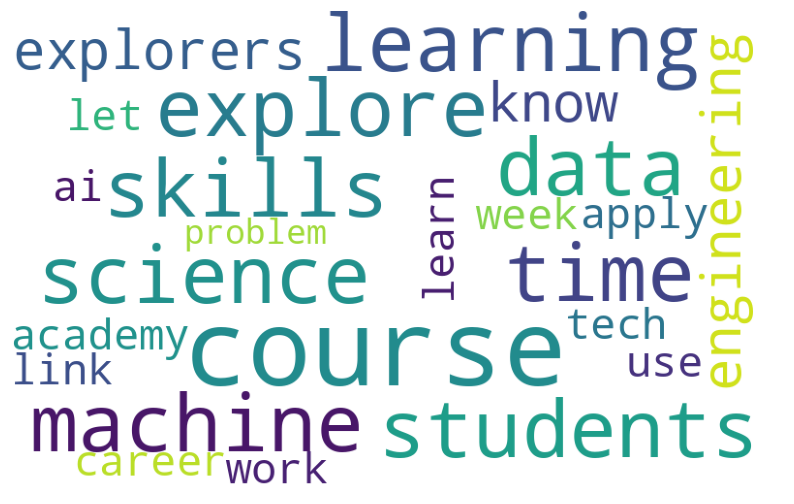

In [80]:
fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(wordcloud)
for ax in fig.axes:
    plt.sca(ax)
    plt.axis('off')
plt.show()

Spliting training set and validation set

In [ ]:
X = df_train['lemmatized']
y = df_train['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

Training a base model

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

In [ ]:
nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
nb.score(X_train, y_train)

0.94

In [ ]:
nb.score(X_test, y_test)

0.68